<a href="https://colab.research.google.com/github/clet1019/data_science/blob/main/HW7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0



4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model1.fit(x_train, y_train, epochs=10)

test_loss1, test_acc1 = model1.evaluate(x_test, y_test)
print("Test accuracy for feedforward neural network:", test_acc1)


Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.4963 - accuracy: 0.8256
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3753 - accuracy: 0.8656
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3346 - accuracy: 0.8777
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3114 - accuracy: 0.8863
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2949 - accuracy: 0.8917
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2779 - accuracy: 0.8968
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2675 - accuracy: 0.9007
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2580 - accuracy: 0.9033
Epoch 9/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.2459 - accuracy: 0.9076
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.3331

In [ ]:
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

model2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model2.fit(x_train, y_train, epochs=10)

test_loss2, test_acc2 = model2.evaluate(x_test, y_test)
print("Test accuracy for convolutional neural network:", test_acc2)


KeyboardInterrupt: ignored

313/313 [==============================] - 3s 9ms/step
Correct predictions:


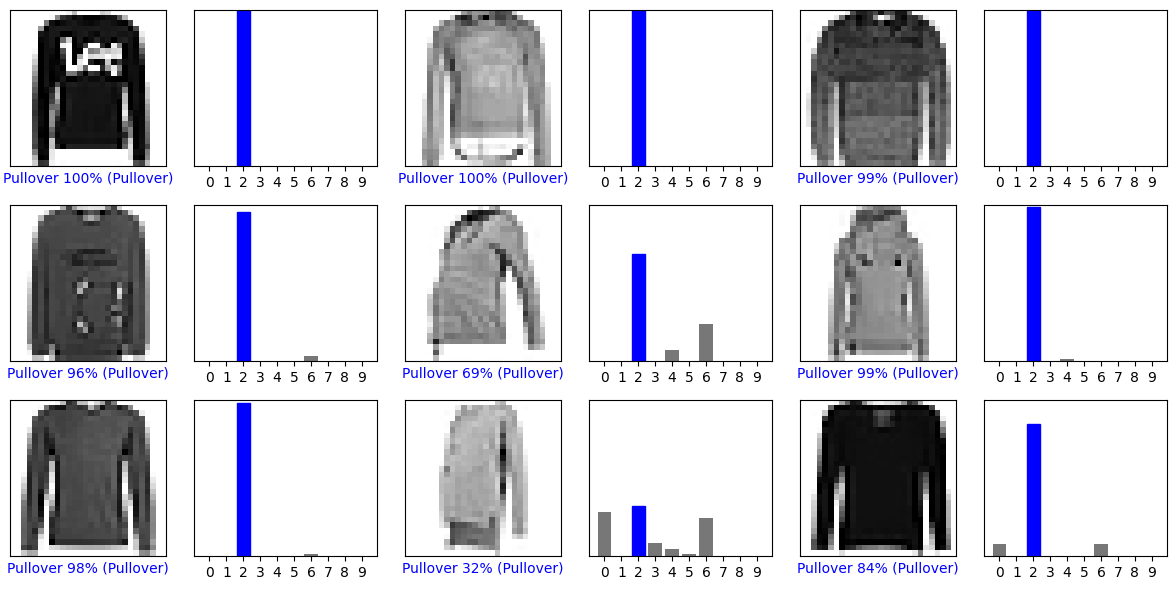

Incorrect predictions:


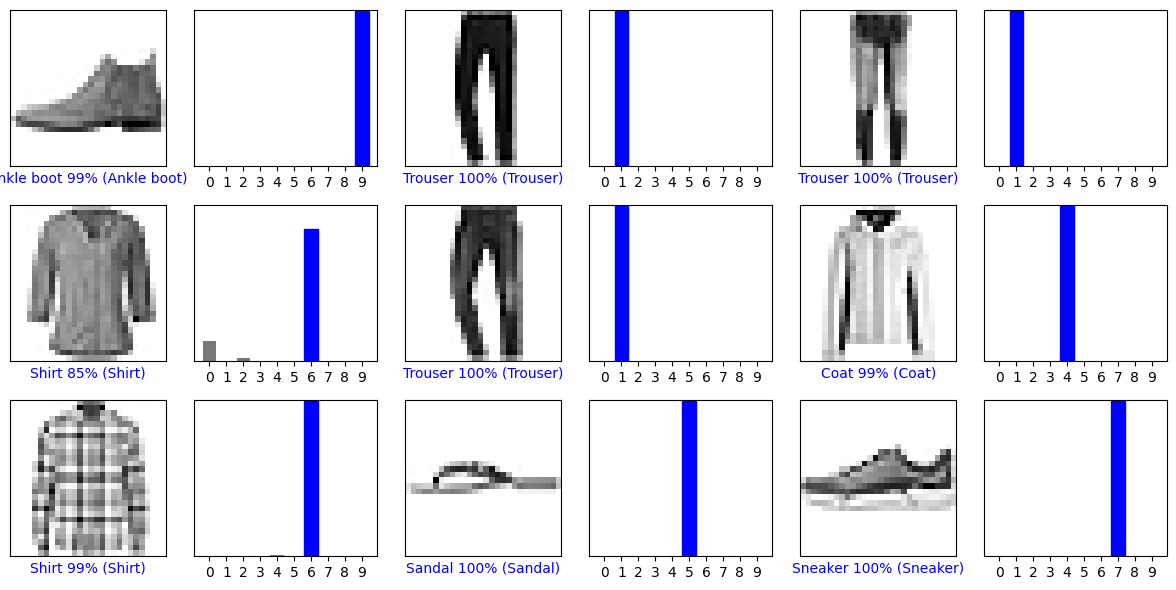

In [ ]:
def plot_predictions(predictions, labels, images):
    num_rows, num_cols = 3, 3
    num_images = num_rows * num_cols
    plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
    for i in range(num_images):
        plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
        plot_image(predictions[i], labels[i], images[i])
        plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
        plot_value_array(predictions[i], labels[i])
    plt.tight_layout()
    plt.show()


def plot_image(prediction, true_label, img):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(prediction)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100 * np.max(prediction),
                                class_names[true_label]),
                                color=color)
    
def plot_value_array(prediction, true_label):
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), prediction, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(prediction)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

predictions1 = model1.predict(x_test)
predictions2 = model2.predict(x_test)

# Find indices of correct and incorrect predictions
correct_indices = []
incorrect_indices = []
for i, (p1, p2) in enumerate(zip(predictions1, predictions2)):
    if np.argmax(p1) == y_test[i] and np.argmax(p2) == y_test[i]:
        correct_indices.append(i)
    elif len(incorrect_indices) < 9:
        incorrect_indices.append(i)

# Plot correct predictions
print("Correct predictions:")
plot_predictions(predictions1[correct_indices[:9]], y_test[correct_indices[:9]], x_test[correct_indices[:9], :, :, 0])

# Plot incorrect predictions
print("Incorrect predictions:")
plot_predictions(predictions1[incorrect_indices], y_test[incorrect_indices], x_test[incorrect_indices, :, :, 0])
